In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Loading File
df = pd.read_csv('Iris.csv',header = None)
df.head()

,0,1,2,3,4,5
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
import csv
with open('Iris.csv') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        print(' , '.join(row))

1 , 5.1 , 3.5 , 1.4 , 0.2 , Iris-setosa
2 , 4.9 , 3.0 , 1.4 , 0.2 , Iris-setosa
3 , 4.7 , 3.2 , 1.3 , 0.2 , Iris-setosa
4 , 4.6 , 3.1 , 1.5 , 0.2 , Iris-setosa
5 , 5.0 , 3.6 , 1.4 , 0.2 , Iris-setosa
6 , 5.4 , 3.9 , 1.7 , 0.4 , Iris-setosa
7 , 4.6 , 3.4 , 1.4 , 0.3 , Iris-setosa
8 , 5.0 , 3.4 , 1.5 , 0.2 , Iris-setosa
9 , 4.4 , 2.9 , 1.4 , 0.2 , Iris-setosa
10 , 4.9 , 3.1 , 1.5 , 0.1 , Iris-setosa
11 , 5.4 , 3.7 , 1.5 , 0.2 , Iris-setosa
12 , 4.8 , 3.4 , 1.6 , 0.2 , Iris-setosa
13 , 4.8 , 3.0 , 1.4 , 0.1 , Iris-setosa
14 , 4.3 , 3.0 , 1.1 , 0.1 , Iris-setosa
15 , 5.8 , 4.0 , 1.2 , 0.2 , Iris-setosa
16 , 5.7 , 4.4 , 1.5 , 0.4 , Iris-setosa
17 , 5.4 , 3.9 , 1.3 , 0.4 , Iris-setosa
18 , 5.1 , 3.5 , 1.4 , 0.3 , Iris-setosa
19 , 5.7 , 3.8 , 1.7 , 0.3 , Iris-setosa
20 , 5.1 , 3.8 , 1.5 , 0.3 , Iris-setosa
21 , 5.4 , 3.4 , 1.7 , 0.2 , Iris-setosa
22 , 5.1 , 3.7 , 1.5 , 0.4 , Iris-setosa
23 , 4.6 , 3.6 , 1.0 , 0.2 , Iris-setosa
24 , 5.1 , 3.3 , 1.7 , 0.5 , Iris-setosa
25 , 4.8 , 3.4 , 1.9 , 0.

In [4]:
import csv
import random
def handleDataset(filename, split, trainSets = [], testSets = []):
    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset) - 1):
                for y in range(4):
                    dataset[x][y] = float(dataset[x][y])
                    if random.random() < split:
                        trainSets.append(dataset[x])
                    else:
                       testSets.append(dataset[x])

In [5]:
trainSets =[]
testSets=[]
handleDataset('Iris.csv', 0.66, trainSets, testSets)
print ('Train Set for KNN: ' + repr(len(trainSets)))
print ('Test set for KNN: ' + repr(len(testSets)))

Train Set for KNN: 383
Test set for KNN: 213


In [7]:
import math 
def euclidean_distance(insta_one, insta_two, length):
        distance = 0
        for x in range(length):
             distance += pow((insta_one[x] - insta_two[x]), 2)
        return math.sqrt(distance)

In [8]:
data_one = [5, 5, 5, 'a']
data_two = [6, 6, 6, 'b']
distance = euclidean_distance(data_one, data_two, 3)
print ('The distance between two points is: ' + repr(distance))

The distance between two points is: 1.7320508075688772


In [9]:
import operator
def getKNeighbors(trainSet, testInstance, K):
    distance = []
    length = len(testInstance) - 1
    for x in range(len(trainSet)):
        dist = euclidean_distance(testInstance, trainSet[x], length)
        distance.append((trainSet[x], dist))
        distance.sort(key = operator.itemgetter(1))
        neighbors = []
        for x in range(k):
            neighbors.append(distance[x][0])
        return neighbors

In [11]:
trainSet = [[5, 5, 5, 'a'], [6, 6, 6, 'b']]
testInstance = [7, 7, 7]
k = 1
neighbors = getKNeighbors(trainSet, testInstance, 1)
print('The nearest neighbors is:', neighbors)

The nearest neighbors is: [[5, 5, 5, 'a']]


In [12]:
import operator
def getResponse(neighbors):
    vote_class = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
    if response in vote_class:
        vote_class[response] += 1
    else:
        vote_class[response] = 1
    sortedVotes = sorted(vote_class.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

In [13]:
neighbors = [[5,5,5,'a'], [6,6,6,'a'], [7,7,7,'b']]
print('Majority Vote Response: ',getResponse(neighbors))

Majority Vote Response:  b


In [14]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [35]:
testSet = [[5,5,5,'a'], [6,6,6,'a'], [7,7,7,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print('Accuracy of predictions out of predictions made', round((accuracy) , 2 ) , '%')

Accuracy of predictions out of predictions made 66.67 %


In [15]:
#The below code is for decision boundary for KNN

In [15]:
# import some data to play with
irisData = datasets.load_iris()
irisData.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:

# we only take the first two features for learning purpose
X = irisData.data[:, :2]
y = irisData.target

In [24]:
n_neighbors = 15


KNN classifier accuracy - "uniform" - 0.807
KNN classifier accuracy - "distance" - 0.927


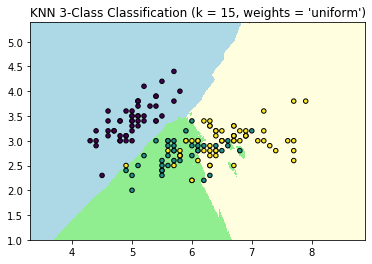

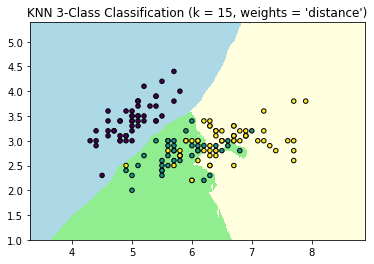

In [25]:
step = .01  # step size in the mesh

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    classifier = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    classifier.fit(X, y)
    
    print('KNN classifier accuracy - "%s" - %.3f' % (weights,classifier.score(X,y)))
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x_grid, y_grid = np.meshgrid(np.arange(x_min, x_max, step = step),
                         np.arange(y_min, y_max, step = step))
    Z = classifier.predict(np.c_[x_grid.ravel(), y_grid.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(x_grid.shape)
    plt.figure()
    plt.pcolormesh(x_grid, y_grid, Z, cmap=ListedColormap(['lightblue', 'lightgreen', 'lightyellow']) )

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, 
                edgecolor='k', s=20)
    plt.xlim(x_grid.min(), x_grid.max())
    plt.ylim(y_grid.min(), y_grid.max())
    plt.title("KNN 3-Class Classification (k = %d, weights = '%s')"
              % (n_neighbors, weights))


plt.show()


In [ ]:
#The below done using sci-kit learn and bulit function's

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [46]:
iris = pd.read_csv('Iris.csv', header = None)
iris

,0,1,2,3,4,5
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [47]:
iris = pd.read_csv('Iris.csv', header = None)
iris.columns = ["S.no","sepal_length", "sepal_width", 
                "petal_length", "petal_width", "target_class"]
iris.dropna(how ='all', inplace = True)
iris.head()

,S.no,sepal_length,sepal_width,petal_length,petal_width,target_class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
iris.target_class.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: target_class, dtype: object

In [49]:
labelencoder = LabelEncoder()
iris['target_class'] = labelencoder.fit_transform(iris['target_class'])

In [50]:
iris.target_class.unique()

array([0, 1, 2])

In [51]:
data = iris.iloc[:, iris.columns != 'target_class']

In [52]:
data.head

<bound method NDFrame.head of      S.no  sepal_length  sepal_width  petal_length  petal_width
0       1           5.1          3.5           1.4          0.2
1       2           4.9          3.0           1.4          0.2
2       3           4.7          3.2           1.3          0.2
3       4           4.6          3.1           1.5          0.2
4       5           5.0          3.6           1.4          0.2
..    ...           ...          ...           ...          ...
145   146           6.7          3.0           5.2          2.3
146   147           6.3          2.5           5.0          1.9
147   148           6.5          3.0           5.2          2.0
148   149           6.2          3.4           5.4          2.3
149   150           5.9          3.0           5.1          1.8

[150 rows x 5 columns]>

In [53]:
target  = iris.iloc[:, iris.columns == 'target_class']

In [54]:
target.head()

,target_class
0,0
1,0
2,0
3,0
4,0


In [55]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 524)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 5)
(45, 5)
(105, 1)
(45, 1)


In [57]:
k_range = range(1,26)
scores = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    score_list.append(metrics.accuracy_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A

In [58]:
score_list

[0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 1.0,
 0.9777777777777777,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9777777777777777,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9555555555555556,
 0.9333333333333333,
 0.9111111111111111]

In [59]:
scores


{1: 0.9555555555555556,
 2: 0.9555555555555556,
 3: 0.9555555555555556,
 4: 0.9555555555555556,
 5: 0.9555555555555556,
 6: 0.9555555555555556,
 7: 0.9555555555555556,
 8: 0.9555555555555556,
 9: 0.9555555555555556,
 10: 0.9555555555555556,
 11: 1.0,
 12: 0.9777777777777777,
 13: 0.9777777777777777,
 14: 0.9555555555555556,
 15: 0.9555555555555556,
 16: 0.9555555555555556,
 17: 0.9777777777777777,
 18: 0.9555555555555556,
 19: 0.9777777777777777,
 20: 0.9555555555555556,
 21: 0.9555555555555556,
 22: 0.9555555555555556,
 23: 0.9555555555555556,
 24: 0.9333333333333333,
 25: 0.9111111111111111}

Text(0, 0.5, 'Testing accuracy')

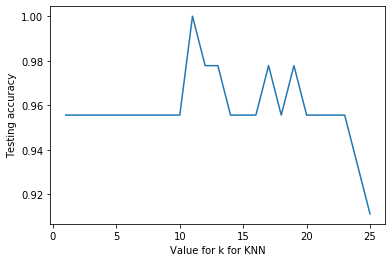

In [60]:
plt.plot(k_range, score_list)
plt.xlabel('Value for k for KNN')
plt.ylabel('Testing accuracy')